In [1]:
cd DL/SuperResolution/generic/

/media/D/users/Netanell/DL/SuperResolution/generic


In [2]:
import os
os.environ["LD_LIBRARY_PATH"] = "/usr/local/cuda/lib64/"
import DirDataGenerator
import CaseLoader
import DataGeneratorImage
import matplotlib.pyplot as plt
import numpy as np
import cv2

Using TensorFlow backend.


In [3]:
#d1 = DirDataGenerator.DirDataGenerator(1, r"D:/users/Netanell/data2/Patients/", CaseLoader.CaseLoader(), DataGeneratorImage.DataGenerator)
#d2 = DirDataGenerator.DirDataGenerator(1, r"D:/users/Netanell/data2/Patients/", CaseLoader.CaseLoader(file_names=['image_t2.mat', 'image_flair_full.mat', 'image_flair_full_undersampled_0.15.mat']), DataGeneratorImage.DataGenerator)
d2 = DirDataGenerator.DirDataGenerator(1, r"/media/D/users/EladP/data/Patients/", CaseLoader.CaseLoader(file_names=['image_t2.mat', 'image_flair_full.mat', 'image_flair_full_undersampled_0.25.mat']), DataGeneratorImage.DataGeneratorImage,training_split=1, validation_split=0,)

Total cases: 476
Training cases: 476
Validation cases: 37
Test cases: 0
Ignored: 1908


In [4]:
#dk = DirDataGenerator.DirDataGenerator(1, r"D:/users/Netanell/data2/Patients/", CaseLoader.CaseLoader(file_names=['image_flair_full_undersampled_0.05.mat', 'image_flair_full.mat', 'image_flair_full_undersampled_0.25.mat'], field_names = ['flair_full_undersampled_image', 'flair_full_image', 'flair_full_undersampled_image']), DataGeneratorImage.DataGenerator)
aaa1 = [a for a in d2.get_validation_generator()]
for i in range(len(aaa1)):
#     im_dicom = cv2.resize(np.rot90(np.flipud(np.squeeze(aaa1[i][2]))), (280,256) )[:,12:256+12]
#     im_dicom = im_dicom / 1800.
    im_dicom = np.squeeze(aaa1[i][2])
    print (np.min(im_dicom), np.max(im_dicom))
    im2 = aaa1[i][1][0,:,:,0]
    im3, im4 = aaa1[i][0][0,:,:,0], aaa1[i][0][0,:,:,1]
    print (im2.shape, im_dicom.shape, im3.shape, im4.shape)
    cv2.imwrite(r"D:/users/Netanell/work/keras-gan/pix2pix/datasets/mri_flair_dicom/%d.png" % (i, ), np.concatenate([im_dicom, im2, im3 ,im4], axis=1)* 256.)


0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256) (256, 256) (256, 256)
0.0 1.0
(256

In [ ]:
debug

> d:\users\netanell\dl\superresolution\generic\datageneratorimage.py(94)load_dicom_files()
     91         full_flair = dicom.dcmread(flair_file)
     92         y = np.squeeze(full_flair.pixel_array)
     93         y = y[10:10+256,22:22+256]
---> 94         y = MathHelpers.normalize(MathHelpers.rescale(np.rot90(np.flipud())))
     95         return y

ipdb> print (y.shape)
(256, 256)


In [63]:
im_dicom = cv2.resize(np.rot90(np.flipud(np.squeeze(aaa1[0][2]))), (280,280) )[12:256+12, 12:256+12]
all_dicoms = np.concatenate([a[2] for a in aaa1])
all_pic =  np.concatenate([a[1] for a in aaa1])

In [64]:
np.histogram(all_pic, bins=100)

(array([ 40190, 396686, 392193, 254595, 137034,  70833,  44810,  36256,
         32207,  31322,  33099,  39638,  47631,  55104,  59395,  62228,
         63217,  62631,  58518,  53511,  47723,  40521,  34587,  28591,
         23562,  19553,  16317,  13610,  12093,  10475,   9353,   8531,
          7560,   7057,   6456,   6303,   5981,   5782,   5716,   5392,
          5326,   5306,   5048,   4894,   4916,   4795,   4711,   4586,
          4395,   4309,   4170,   4140,   3931,   4005,   3823,   3814,
          3651,   3603,   3585,   3435,   3450,   3297,   3356,   3183,
          3065,   2944,   2955,   2798,   2753,   2494,   2449,   2243,
          2063,   1893,   1716,   1539,   1347,   1238,   1041,    958,
           848,    740,    633,    553,    524,    394,    368,    318,
           214,    189,    147,    101,     79,     55,     48,     30,
            23,     21,     13,     48], dtype=int64),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       

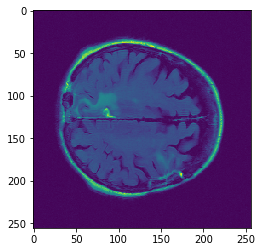

In [23]:
plt.imshow(np.squeeze(aaa1[0][1]))

In [49]:
aaa1 = [a for a in d1.get_validation_generator()]
aaa2 = [a for a in d2.get_validation_generator()]
for i in range(len(aaa1)):
    cv2.imwrite(r"D:/users/Netanell/work/keras-gan/pix2pix/datasets/mri_t2_flaire/val/%d.png" % (i, ), np.concatenate([aaa1[i][1][0,:,24:24+256,0], aaa1[i][0][0,:,24:24+256,1], aaa1[i][0][0,:,24:24+256,0]], axis=1))
for i in range(len(aaa2)):
    cv2.imwrite(r"D:/users/Netanell/work/keras-gan/pix2pix/datasets/mri_t2_flaire/val/%d.png" % (len(aaa1) + i, ), np.concatenate([aaa2[i][1][0,:,24:24+256,0], aaa2[i][0][0,:,24:24+256,1], aaa2[i][0][0,:,24:24+256,0]], axis=1))

NameError: name 'd1' is not defined

In [50]:
aaa1 = [a for a in d2.get_test_generator()]
aaa2 = [a for a in d2.get_training_generator()]
for i in range(len(aaa1)):
    cv2.imwrite(r"D:/users/Netanell/work/keras-gan/pix2pix/datasets/mri_t2_flaire/train/%d.png" % (i, ), np.concatenate([aaa1[i][1][0,:,24:24+256,0], aaa1[i][0][0,:,24:24+256,1], aaa1[i][0][0,:,24:24+256,0]], axis=1))
for i in range(len(aaa2)):
    cv2.imwrite(r"D:/users/Netanell/work/keras-gan/pix2pix/datasets/mri_t2_flaire/train/%d.png" % (len(aaa1) + i, ), np.concatenate([aaa2[i][1][0,:,24:24+256,0], aaa2[i][0][0,:,24:24+256,1], aaa2[i][0][0,:,24:24+256,0]], axis=1))

In [47]:
aaa1 = [a for a in d2.get_validation_generator()]
#aaa2 = [a for a in d2.get_test_generator()]
for i in range(len(aaa1)):
    cv2.imwrite(r"D:/users/Netanell/work/keras-gan/pix2pix/datasets/mri_t2_flair/test/%d.png" % (i, ), np.concatenate([aaa1[i][1][0,:,24:24+256,0], aaa1[i][0][0,:,24:24+256,1], aaa1[i][0][0,:,24:24+256,0]], axis=1))
# for i in range(len(aaa2)):
#     cv2.imwrite(r"D:/users/Netanell/work/keras-gan/pix2pix/datasets/mri_t2_flair/test/%d.png" % (len(aaa1) + i, ), np.concatenate([aaa2[i][1][0,:,24:24+256,0], aaa2[i][0][0,:,24:24+256,1], aaa2[i][0][0,:,24:24+256,0]], axis=1))

In [11]:
aaa1[i][0][0,:,24:24+256,0].shape

(256, 256)

In [5]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [22]:
scipy.io.loadmat("D:/users/EladP/data/Patients/2019_Jan_02/slice_11/image_flair_full_undersampled_0.25.mat")

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jan 03 15:29:56 2019',
 '__version__': '1.0',
 '__globals__': [],
 'flair_full_undersampled_image': array([[ 7,  6,  3, ...,  4,  4,  5],
        [ 6,  6,  3, ...,  6,  5,  5],
        [ 5,  6,  2, ...,  6,  5,  6],
        ...,
        [ 4,  9,  5, ...,  4,  4,  4],
        [ 4, 10,  3, ...,  4,  4,  3],
        [ 4, 11,  3, ...,  3,  4,  4]], dtype=uint8)}

In [2]:
import scipy.misc

In [18]:
path = r"D:/users/Netanell/work/keras-gan/pix2pix/datasets/mri_t2_flair/test/29.png"
a1 = scipy.misc.imread(path, mode='L')
a2 = cv2.imread(path)

C:\Users\netanell\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


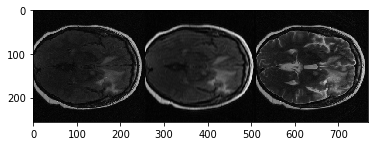

In [16]:
plt.imshow((a1/127.5)-1, cmap="gray")

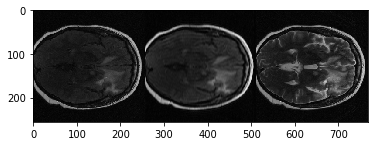

In [22]:
plt.imshow(a2)

In [15]:
import os.path
import os
DATASETS_BASEDIR = r"D:/users/Netanell/work/keras-gan/pix2pix/datasets/"
def take3(im_arr):
    return np.concatenate([im_arr[1][0,:,:,0], im_arr[0][0,:,:,1], im_arr[0][0,:,:,0]], axis=1)*256.
def take3_dicom(im_arr):
    return np.concatenate([np.squeeze(im_arr[2]), im_arr[0][0,:,:,1] , im_arr[0][0,:,:,0]], axis=1)*256.

def take2(im_arr):
    return np.concatenate([im_arr[1][0,:,:,0],  im_arr[0][0,:,:,0]], axis=1)
def take2lrhr(im_arr):
    return np.concatenate([im_arr[1][0,:,:,0], im_arr[0][0,:,:,1]], axis=1)


def take3_RGB(im_arr):
    return np.stack([im_arr[1][0,:,:,0], im_arr[0][0,:,:,0], np.zeros([256,256])], axis=2)*256.


def create_dataset(foldername, ds, takefunc=take3):
                           
    aaa1 = [a for a in ds.get_training_generator()]
    aaa2 = [a for a in ds.get_test_generator()]
    fullfolder = os.path.join(DATASETS_BASEDIR, foldername)
    trainfolder = os.path.join(fullfolder, "train")
    os.makedirs(fullfolder, exist_ok=True)
    os.makedirs(trainfolder, exist_ok=True)
    for i in range(len(aaa1)):
        cv2.imwrite(os.path.join(trainfolder, "%d.png" % (i, )), takefunc(aaa1[i]))
    for i in range(len(aaa2)):
        cv2.imwrite(os.path.join(trainfolder, "%d.png" % (i + len(aaa1), )), takefunc(aaa2[i]))
    
    testfolder = os.path.join(fullfolder, "test")
    os.makedirs(testfolder, exist_ok=True)
    aaa3 = [a for a in ds.get_validation_generator()]
                    
    for i in range(len(aaa3)):
        cv2.imwrite(os.path.join(testfolder, "%d.png" % (i, )), takefunc(aaa3[i]))
   

In [16]:
create_dataset("mri_flair_25_t2_rgb", d2, takefunc=take3_RGB)

In [ ]:
d

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


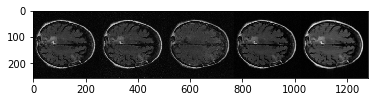

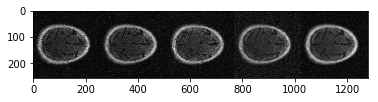

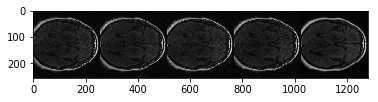

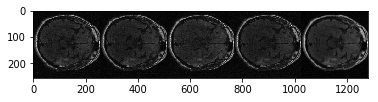

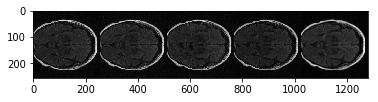

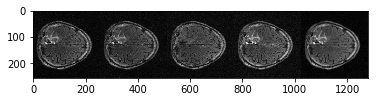

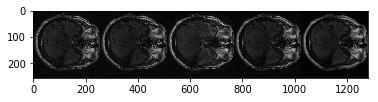

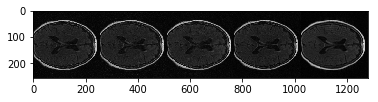

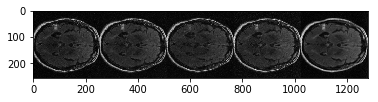

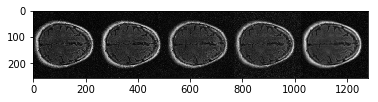

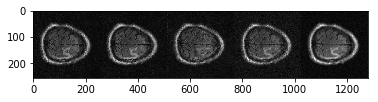

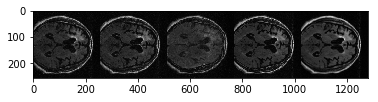

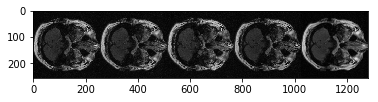

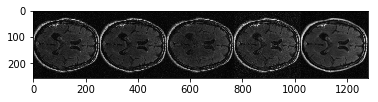

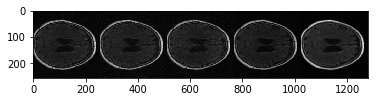

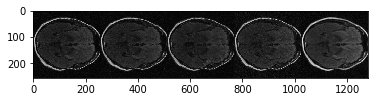

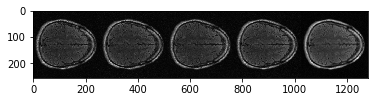

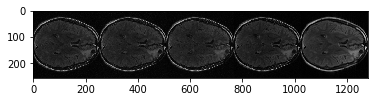

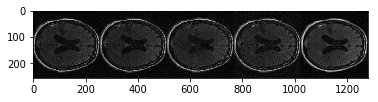

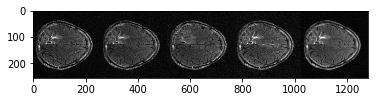

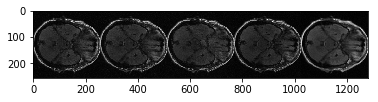

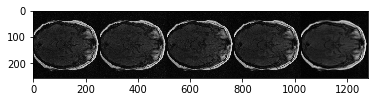

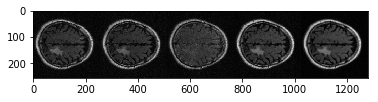

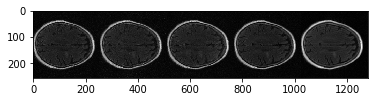

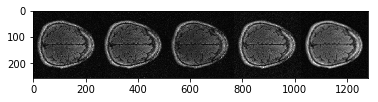

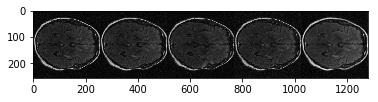

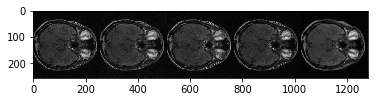

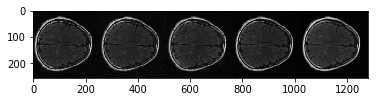

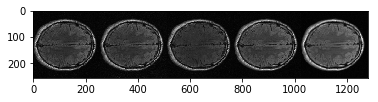

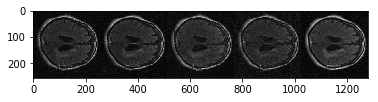

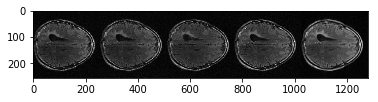

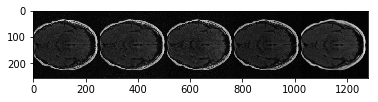

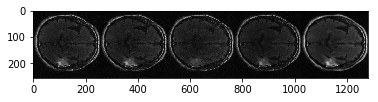

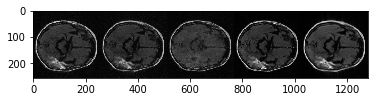

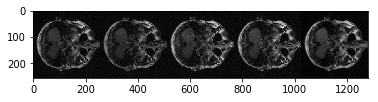

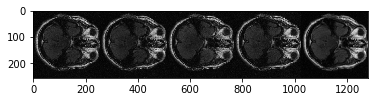

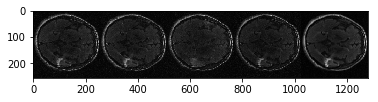

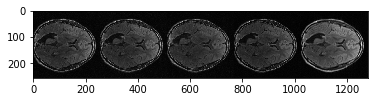

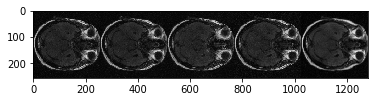

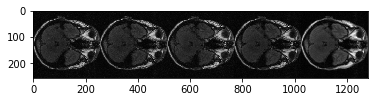

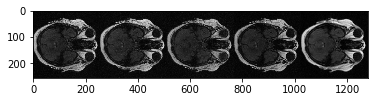

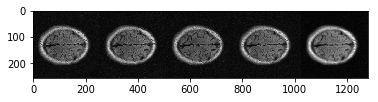

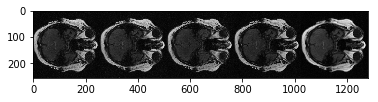

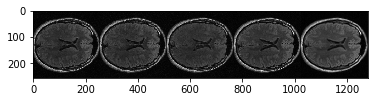

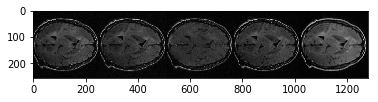

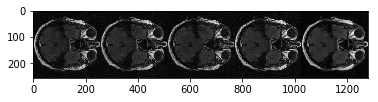

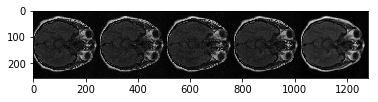

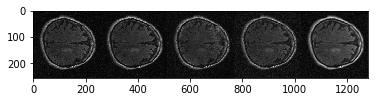

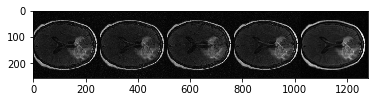

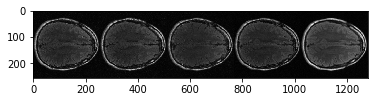

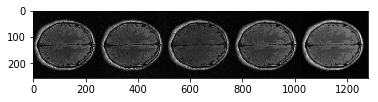

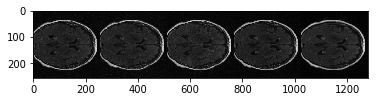

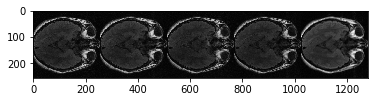

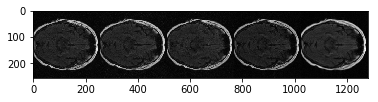

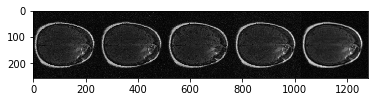

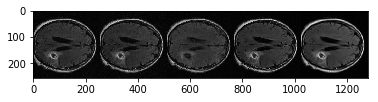

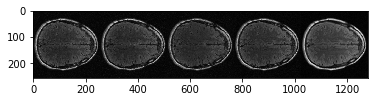

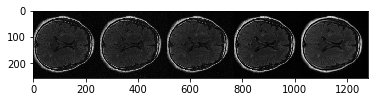

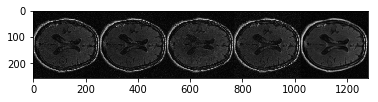

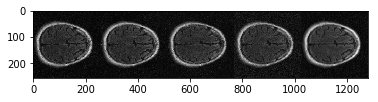

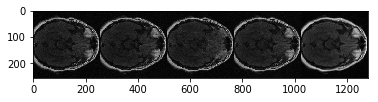

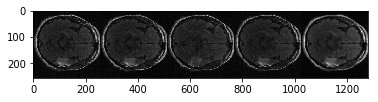

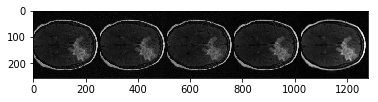

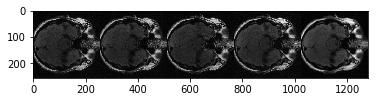

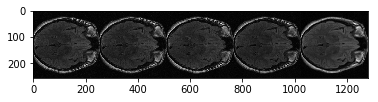

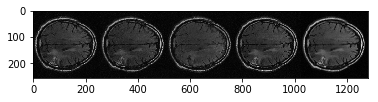

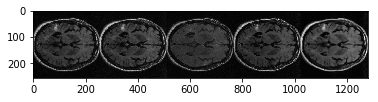

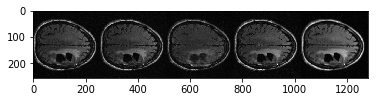

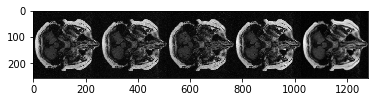

<Figure size 432x288 with 0 Axes>

In [89]:
import glob
DIRS = [r"d:/users/Netanell/work/pytorch-CycleGAN-and-pix2pix/results/mri_flair_T2_25_2/test_latest/images/",
        r"d:/users/Netanell/work/pytorch-CycleGAN-and-pix2pix/results/mri_flair_lr_hr/test_latest/images/",
        r"d:/users/Netanell/work/pytorch-CycleGAN-and-pix2pix/results/mrit2hr_flairhr_pix2pix/test_latest/images/",]
outdir = r"d:/users/Netanell/output1"
os.makedirs(outdir, exist_ok=True)
globa = [glob.iglob(a+"*_fake_B.png") for a in DIRS]
globa.append(glob.iglob(DIRS[0]+"*_real_B.png"))
globa.append(glob.iglob(DIRS[0]+"*_real_A.png"))
for K1 in zip(*globa):
    img_arr = [cv2.imread(k) for k in K1]
    img_arr[-1] = img_arr[-1][:256,:]
    print (img_arr[-1].shape)
    imgs = np.concatenate(img_arr, axis=1)
    plt.imshow(imgs)
    plt.figure()
    imname = os.path.basename(K1[-1]).split("_real_B.png")[0] + "_total.png"
    imname = os.path.join(outdir, imname)
    cv2.imwrite(imname, imgs)

In [9]:
import DirScanner
# Generate NiftI

root = r"/media/D/users/EladP/data/Patients/"
caseloader = CaseLoader.CaseLoader(file_names=['image_t2.mat', 'image_flair_full.mat', 'image_flair_full_undersampled_0.25.mat'])
ds = DirScanner.DirScanner(root_dir=root, case_loader=caseloader)

In [3]:
import evaluate
import glob

In [4]:
patientlist = glob.glob(r"/media/D/users/EladP/data/Patients/*/")

In [50]:
for patdir in patientlist:
#     if "2019_Jan_23" not in patdir:
#         continue #Patch for speedup
    pat_id = patdir.split("/")[-2]
    pat_mat = evaluate.Evaluate.getAllSlices(patdir)
    #pat_newdir = patdir.replace("/media/D/users/EladP/data/", "/media/D/users/Netanell/NiiTrials/")
    pat_newdir = r"/media/D/users/Netanell/NiiTrials2/"
    os.makedirs(pat_newdir, exist_ok=True)
    
    if "2019_Jan_23" in patdir:
        pat_mat = reindex(pat_mat)

    
    for contrast in ["T2_HR", "Flair_HR", "Flair_LR"]:
        pat_constract_file = os.path.join(pat_newdir, pat_id+"."+contrast+".nii")
        if len(pat_mat) > 0:
            evaluate.Evaluate.slices2nifty(np.array(pat_mat[contrast].tolist()), pat_constract_file)

Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/ ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/dicom ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/dicom/St38_Se41_tra_t2_tirm_dark-fluid ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/dicom/St38_Se42_tra_t2_tirm_dark-fluid-Phase25 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/dicom/St38_Se43_tra_t2_tse ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/slice_1 ...........

/media/D/users/Netanell/DL/SuperResolution/generic/Data.py:45: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  if 'ignore' in meta and meta['ignore']:


ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/slice_1/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/slice_1/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/slice_1/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/slice_1/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/slice_1/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/slice_1/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/slice_1/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/slice_1/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/slice_1/coil2 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Aug_14_1/

Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_12 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_12/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_12/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_12/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_12/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_12/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_12/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_12/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_12/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_12/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_17 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_17/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_17/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_17/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_17/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_17/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_17/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_17/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_17/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_17/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_21 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_21/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_21/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_21/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_21/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_21/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_21/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_21/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_21/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_21/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_26 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_26/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_26/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_26/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_26/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_26/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_26/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_26/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_26/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_26/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_30 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_30/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_30/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_30/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_30/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_30/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_30/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_30/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_30/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_30/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_6 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_6/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_6/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_6/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_6/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_6/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_6/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_6/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_6/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Dec_27/slice_6/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_12_1/slice_1 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_12_1/slice_1/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_12_1/slice_1/coil2 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_12_1/slice_1/coil3 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_12_1/slice_1/coil4 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_12_1/slice_1/coil5 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_12_1/slice_1/coil6 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_12_1/slice_1/coil7 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_12_1/slice_1/coil8 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_12_2/ ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_24/slice_1 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_24/slice_1/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_24/slice_1/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_24/slice_1/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_24/slice_1/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_24/slice_1/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_24/slice_1/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_24/slice_1/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_24/slice_1/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Jul_24/slice_1/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_11 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_11/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_11/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_11/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_11/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_11/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_11/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_11/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_11/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_11/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_16 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_16/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_16/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_16/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_16/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_16/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_16/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_16/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_16/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_16/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_20 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_20/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_20/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_20/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_20/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_20/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_20/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_20/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_20/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_20/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_25 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_25/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_25/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_25/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_25/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_25/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_25/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_25/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_25/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_25/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_3 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_3/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_3/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_3/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_3/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_3/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_3/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_3/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_3/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_3/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_5 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_5/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_5/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_5/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_5/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_5/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_5/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_5/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_5/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_04/slice_5/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/ ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/dicom ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/dicom/St26_Se41_tra_t2_tirm_dark-fluid ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/dicom/St26_Se42_tra_t2_tirm_dark-fluid-Phase25 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/dicom/St26_Se43_tra_t2_tse ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_1 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_1/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_1/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_1/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_13 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_13/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_13/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_13/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_13/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_13/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_13/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_13/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_13/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_13/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_17 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_17/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_17/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_17/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_17/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_17/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_17/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_17/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_17/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_17/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_20 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_20/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_20/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_20/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_20/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_20/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_20/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_20/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_20/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_20/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_24 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_24/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_24/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_24/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_24/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_24/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_24/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_24/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_24/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_24/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_28 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_28/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_28/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_28/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_28/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_28/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_28/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_28/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_28/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_28/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_31 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_31/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_31/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_31/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_31/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_31/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_31/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_31/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_31/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_31/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_6 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_6/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_6/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_6/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_6/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_6/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_6/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_6/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_6/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_25/slice_6/coil17 ...........Nothing to add


Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/ ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/dicom ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/dicom/St56_Se39_tra_t2_tirm_dark-fluid ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/dicom/St56_Se40_tra_t2_tirm_dark-fluid-Phase25 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/dicom/St56_Se43_tra_t2_tse ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_1 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_1/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_1/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_1/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_13 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_13/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_13/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_13/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_13/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_13/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_13/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_13/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_13/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_13/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_17 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_17/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_17/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_17/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_17/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_17/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_17/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_17/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_17/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_17/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_20 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_20/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_20/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_20/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_20/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_20/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_20/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_20/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_20/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_20/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_24 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_24/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_24/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_24/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_24/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_24/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_24/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_24/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_24/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_24/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_28 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_28/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_28/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_28/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_28/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_28/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_28/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_28/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_28/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_28/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_31 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_31/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_31/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_31/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_31/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_31/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_31/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_31/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_31/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_31/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_6 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_6/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_6/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_6/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_6/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_6/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_6/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_6/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_6/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_27/slice_6/coil17 ...........Nothing to add


Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/ ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/dicom ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/dicom/StT1_Se41_tra_t2_tirm_dark-fluid ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/dicom/StT1_Se42_tra_t2_tirm_dark-fluid-Phase25 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/dicom/StT1_Se43_tra_t2_tse ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_1 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_1/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_1/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_1/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_14 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_14/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_14/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_14/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_14/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_14/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_14/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_14/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_14/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_14/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_19 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_19/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_19/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_19/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_19/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_19/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_19/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_19/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_19/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_19/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_23 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_23/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_23/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_23/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_23/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_23/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_23/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_23/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_23/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_23/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_28 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_28/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_28/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_28/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_28/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_28/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_28/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_28/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_28/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_28/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_32 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_32/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_32/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_32/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_32/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_32/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_32/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_32/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_32/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_32/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_8 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_8/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_8/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_8/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_8/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_8/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_8/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_8/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_8/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Nov_29/slice_8/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_12 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_12/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_12/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_12/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_12/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_12/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_12/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_12/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_12/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_12/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_17 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_17/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_17/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_17/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_17/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_17/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_17/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_17/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_17/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_17/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_21 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_21/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_21/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_21/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_21/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_21/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_21/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_21/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_21/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_21/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_26 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_26/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_26/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_26/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_26/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_26/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_26/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_26/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_26/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_26/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_30 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_30/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_30/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_30/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_30/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_30/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_30/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_30/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_30/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_30/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_6 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_6/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_6/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_6/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_6/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_6/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_6/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_6/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_6/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_07/slice_6/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_10 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_10/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_10/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_10/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_10/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_10/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_10/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_10/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_10/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_10/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_14 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_14/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_14/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_14/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_14/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_14/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_14/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_14/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_14/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_14/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_18 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_18/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_18/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_18/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_18/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_18/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_18/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_18/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_18/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_18/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_21 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_21/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_21/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_21/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_21/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_21/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_21/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_21/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_21/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_21/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_25 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_25/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_25/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_25/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_25/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_25/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_25/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_25/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_25/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_25/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_29 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_29/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_29/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_29/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_29/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_29/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_29/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_29/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_29/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_29/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_32 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_32/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_32/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_32/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_32/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_32/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_32/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_32/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_32/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_32/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_7 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_7/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_7/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_7/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_7/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_7/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_7/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_7/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_7/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_10/slice_7/coil17 ...........Nothing to add


Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_1 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_1/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_1/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_1/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_1/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_1/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_1/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_1/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_1/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_1/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_14 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_14/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_14/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_14/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_14/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_14/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_14/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_14/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_14/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_14/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_19 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_19/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_19/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_19/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_19/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_19/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_19/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_19/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_19/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_19/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_23 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_23/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_23/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_23/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_23/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_23/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_23/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_23/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_23/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_23/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_29 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_29/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_29/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_29/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_29/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_29/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_29/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_29/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_29/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_29/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_4 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_4/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_4/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_4/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_4/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_4/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_4/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_4/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_4/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_4/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_9 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_9/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_9/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_9/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_9/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_9/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_9/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_9/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_9/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_14/slice_9/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_13 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_13/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_13/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_13/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_13/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_13/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_13/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_13/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_13/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_13/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_18 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_18/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_18/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_18/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_18/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_18/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_18/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_18/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_18/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_18/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_22 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_22/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_22/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_22/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_22/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_22/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_22/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_22/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_22/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_22/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_27 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_27/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_27/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_27/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_27/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_27/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_27/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_27/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_27/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_27/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_31 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_31/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_31/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_31/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_31/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_31/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_31/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_31/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_31/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_31/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_7 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_7/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_7/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_7/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_7/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_7/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_7/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_7/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_7/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_18/slice_7/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_11 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_11/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_11/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_11/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_11/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_11/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_11/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_11/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_11/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_11/coi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_15 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_15/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_15/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_15/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_15/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_15/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_15/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_15/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_15/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_15/coi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_19 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_19/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_19/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_19/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_19/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_19/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_19/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_19/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_19/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_19/coi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_22 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_22/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_22/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_22/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_22/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_22/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_22/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_22/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_22/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_22/coi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_26 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_26/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_26/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_26/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_26/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_26/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_26/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_26/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_26/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_26/coi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_3 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_3/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_3/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_3/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_3/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_3/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_3/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_3/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_3/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_3/coil17 ......

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_4 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_4/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_4/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_4/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_4/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_4/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_4/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_4/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_4/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_4/coil17 ......

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_8 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_8/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_8/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_8/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_8/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_8/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_8/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_8/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_8/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_1/slice_8/coil17 ......

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_11 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_11/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_11/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_11/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_11/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_11/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_11/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_11/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_11/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_11/coi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_15 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_15/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_15/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_15/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_15/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_15/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_15/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_15/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_15/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_15/coi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_19 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_19/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_19/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_19/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_19/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_19/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_19/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_19/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_19/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_19/coi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_22 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_22/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_22/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_22/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_22/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_22/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_22/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_22/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_22/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_22/coi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_26 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_26/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_26/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_26/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_26/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_26/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_26/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_26/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_26/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_26/coi

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_3 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_3/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_3/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_3/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_3/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_3/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_3/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_3/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_3/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_3/coil17 ......

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_4 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_4/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_4/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_4/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_4/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_4/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_4/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_4/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_4/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_4/coil17 ......

Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_8 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_8/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_8/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_8/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_8/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_8/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_8/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_8/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_8/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2018_Oct_25_2/slice_8/coil17 ......

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_11 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_11/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_11/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_11/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_11/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_11/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_11/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_11/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_11/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_11/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_16 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_16/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_16/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_16/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_16/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_16/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_16/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_16/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_16/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_16/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_20 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_20/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_20/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_20/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_20/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_20/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_20/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_20/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_20/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_20/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_25 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_25/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_25/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_25/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_25/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_25/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_25/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_25/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_25/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_25/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_3 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_3/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_3/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_3/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_3/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_3/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_3/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_3/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_3/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_3/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_5 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_5/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_5/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_5/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_5/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_5/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_5/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_5/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_5/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_03/slice_5/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/ ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/dicom ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/dicom/Study20180102_115823_619000_screening ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/dicom/Study20180102_115823_619000_screening/Analysis ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/dicom/Study20180102_115823_619000_screening/Analysis/DTI20 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/dicom/Study20180102_115823_619000_screening/Analysis/DTI20/Fibers ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/dicom/Study20180102_115823_619000_screening/KM_001_02JAN2018 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/dicom/Study20180102_115823_619000_screen

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_1 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_1/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_1/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_1/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_1/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_1/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_1/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_1/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_1/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_1/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_14 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_14/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_14/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_14/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_14/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_14/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_14/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_14/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_14/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_14/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_19 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_19/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_19/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_19/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_19/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_19/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_19/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_19/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_19/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_19/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_23 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_23/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_23/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_23/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_23/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_23/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_23/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_23/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_23/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_23/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_28 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_28/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_28/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_28/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_28/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_28/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_28/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_28/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_28/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_28/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_32 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_32/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_32/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_32/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_32/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_32/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_32/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_32/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_32/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_32/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_8 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_8/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_8/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_8/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_8/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_8/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_8/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_8/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_8/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_05/slice_8/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_11 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_11/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_11/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_11/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_11/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_11/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_11/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_11/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_11/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_11/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_15 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_15/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_15/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_15/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_15/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_15/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_15/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_15/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_15/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_15/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_19 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_19/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_19/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_19/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_19/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_19/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_19/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_19/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_19/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_19/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_22 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_22/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_22/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_22/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_22/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_22/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_22/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_22/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_22/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_22/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_26 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_26/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_26/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_26/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_26/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_26/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_26/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_26/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_26/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_26/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_3 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_3/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_3/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_3/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_3/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_3/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_3/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_3/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_3/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_3/coil17 ...........Nothing to add


Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_4 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_4/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_4/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_4/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_4/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_4/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_4/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_4/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_4/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_4/coil17 ...........Nothing to add


Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_8 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_8/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_8/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_8/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_8/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_8/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_8/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_8/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_8/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Feb_10/slice_8/coil17 ...........Nothing to add


Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_11 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_11/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_11/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_11/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_11/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_11/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_11/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_11/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_11/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_11/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_15 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_15/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_15/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_15/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_15/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_15/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_15/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_15/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_15/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_15/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_19 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_19/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_19/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_19/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_19/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_19/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_19/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_19/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_19/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_19/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_22 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_22/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_22/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_22/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_22/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_22/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_22/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_22/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_22/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_22/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_26 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_26/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_26/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_26/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_26/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_26/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_26/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_26/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_26/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_26/coil17 ...........Nothi

Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_3 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_3/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_3/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_3/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_3/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_3/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_3/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_3/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_3/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_3/coil17 ...........Nothing to add


Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_4 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_4/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_4/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_4/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_4/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_4/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_4/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_4/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_4/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_4/coil17 ...........Nothing to add


Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_8 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_8/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_8/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_8/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_8/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_8/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_8/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_8/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_8/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_02/slice_8/coil17 ...........Nothing to add


Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_23_2/slice_20 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_23_2/slice_21 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_23_2/slice_22 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_23_2/slice_23 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_23_2/slice_24 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_23_2/slice_25 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_23_2/slice_26 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_23_2/slice_27 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_23_2/slice_28 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_23_2/slice_29 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_23_2/slice_3 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_J

Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_11 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_11/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_11/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_11/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_11/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_11/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_11/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_11/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_11/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_11/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_16 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_16/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_16/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_16/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_16/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_16/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_16/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_16/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_16/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_16/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_20 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_20/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_20/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_20/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_20/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_20/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_20/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_20/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_20/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_20/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_25 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_25/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_25/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_25/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_25/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_25/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_25/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_25/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_25/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_25/coil2 ...........Nothin

Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_3 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_3/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_3/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_3/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_3/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_3/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_3/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_3/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_3/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_3/coil2 ...........Nothing to add
V

Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_5 ...........ok
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_5/coil1 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_5/coil10 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_5/coil11 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_5/coil12 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_5/coil13 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_5/coil14 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_5/coil15 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_5/coil16 ...........Nothing to add
Visiting dir  /media/D/users/EladP/data/Patients/2019_Jan_24/slice_5/coil2 ...........Nothing to add
V

In [50]:
evaluate.Evaluate.slices2nifty(np.array(e['T2_HR'].tolist()), "/media/D/users/Netanell/1.nii")

In [37]:
def reindex(mat_in):
    indexes = [i+1 for i in range(32)]
    new_indexes = {}
    for i in indexes:
        if i <= 16:
            new_indexes[i] = 2*i 
        else:
            new_indexes[i] = 2*(i-16) -1
    for idx,row in mat_in.iterrows():
        mat_in.loc[idx, "idx_fix"] = new_indexes[row["idx"]]
    mat_in = mat_in.sort_values(by=['idx_fix'])
    return mat_in

In [34]:
pat_mat = pat_mat.sort_values(by=['idx_fix',])
pat_mat["idx_fix"]

0      1.0
8      2.0
11     3.0
9      4.0
22     5.0
10     6.0
26     7.0
12     8.0
27     9.0
13    10.0
28    11.0
14    12.0
29    13.0
15    14.0
30    15.0
16    16.0
31    17.0
17    18.0
1     19.0
18    20.0
2     21.0
19    22.0
3     23.0
20    24.0
4     25.0
21    26.0
5     27.0
23    28.0
6     29.0
24    30.0
7     31.0
25    32.0
Name: idx_fix, dtype: float64

In [47]:
(r"/media/D/users/EladP/data/Patients/2019_Jan_23_1/").split("/")[-2]

'2019_Jan_23_1'

In [59]:
import random
a = [a.split("/")[-2] for a in glob.glob( r"/media/D/users/Netanell/work/csmri-refinement/resources/data/Patients/*/")]
random.shuffle(a)

In [60]:
a

['2018_Oct_07',
 '2019_Jan_23_2',
 '2019_Jan_24',
 '2018_Oct_25_1',
 '2018_Oct_10',
 '2019_Jan_23_1',
 '2019_Feb_10',
 '2018_Nov_27',
 '2018_Oct_25_2',
 '2019_Feb_05',
 '2018_Oct_14',
 '2018_Nov_25',
 '2018_Oct_18',
 '2019_Feb_03',
 '2018_Nov_04',
 '2018_Dec_27',
 '2019_Jan_23_3',
 '2018_Nov_29',
 '2019_Jan_02']